## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Import sklearn preprocessing scalers
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

## Read Data

In [2]:
data = pd.read_csv('Data/prepared_data.csv')
y = data['BALANCE']
data.drop('BALANCE', inplace=True, axis=1)

In [3]:
data.head()

,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12
4,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


## 1. Log Transformation

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 16 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE_FREQUENCY                 8950 non-null   float64
 1   PURCHASES                         8950 non-null   float64
 2   ONEOFF_PURCHASES                  8950 non-null   float64
 3   INSTALLMENTS_PURCHASES            8950 non-null   float64
 4   CASH_ADVANCE                      8950 non-null   float64
 5   PURCHASES_FREQUENCY               8950 non-null   float64
 6   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 7   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 8   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 9   CASH_ADVANCE_TRX                  8950 non-null   int64  
 10  PURCHASES_TRX                     8950 non-null   int64  
 11  CREDIT_LIMIT                      8950 non-null   float64
 12  PAYMEN

array([[<AxesSubplot:title={'center':'BALANCE_FREQUENCY'}>,
        <AxesSubplot:title={'center':'PURCHASES'}>,
        <AxesSubplot:title={'center':'ONEOFF_PURCHASES'}>,
        <AxesSubplot:title={'center':'INSTALLMENTS_PURCHASES'}>],
       [<AxesSubplot:title={'center':'CASH_ADVANCE'}>,
        <AxesSubplot:title={'center':'PURCHASES_FREQUENCY'}>,
        <AxesSubplot:title={'center':'ONEOFF_PURCHASES_FREQUENCY'}>,
        <AxesSubplot:title={'center':'PURCHASES_INSTALLMENTS_FREQUENCY'}>],
       [<AxesSubplot:title={'center':'CASH_ADVANCE_FREQUENCY'}>,
        <AxesSubplot:title={'center':'CASH_ADVANCE_TRX'}>,
        <AxesSubplot:title={'center':'PURCHASES_TRX'}>,
        <AxesSubplot:title={'center':'CREDIT_LIMIT'}>],
       [<AxesSubplot:title={'center':'PAYMENTS'}>,
        <AxesSubplot:title={'center':'MINIMUM_PAYMENTS'}>,
        <AxesSubplot:title={'center':'PRC_FULL_PAYMENT'}>,
        <AxesSubplot:title={'center':'TENURE'}>]], dtype=object)

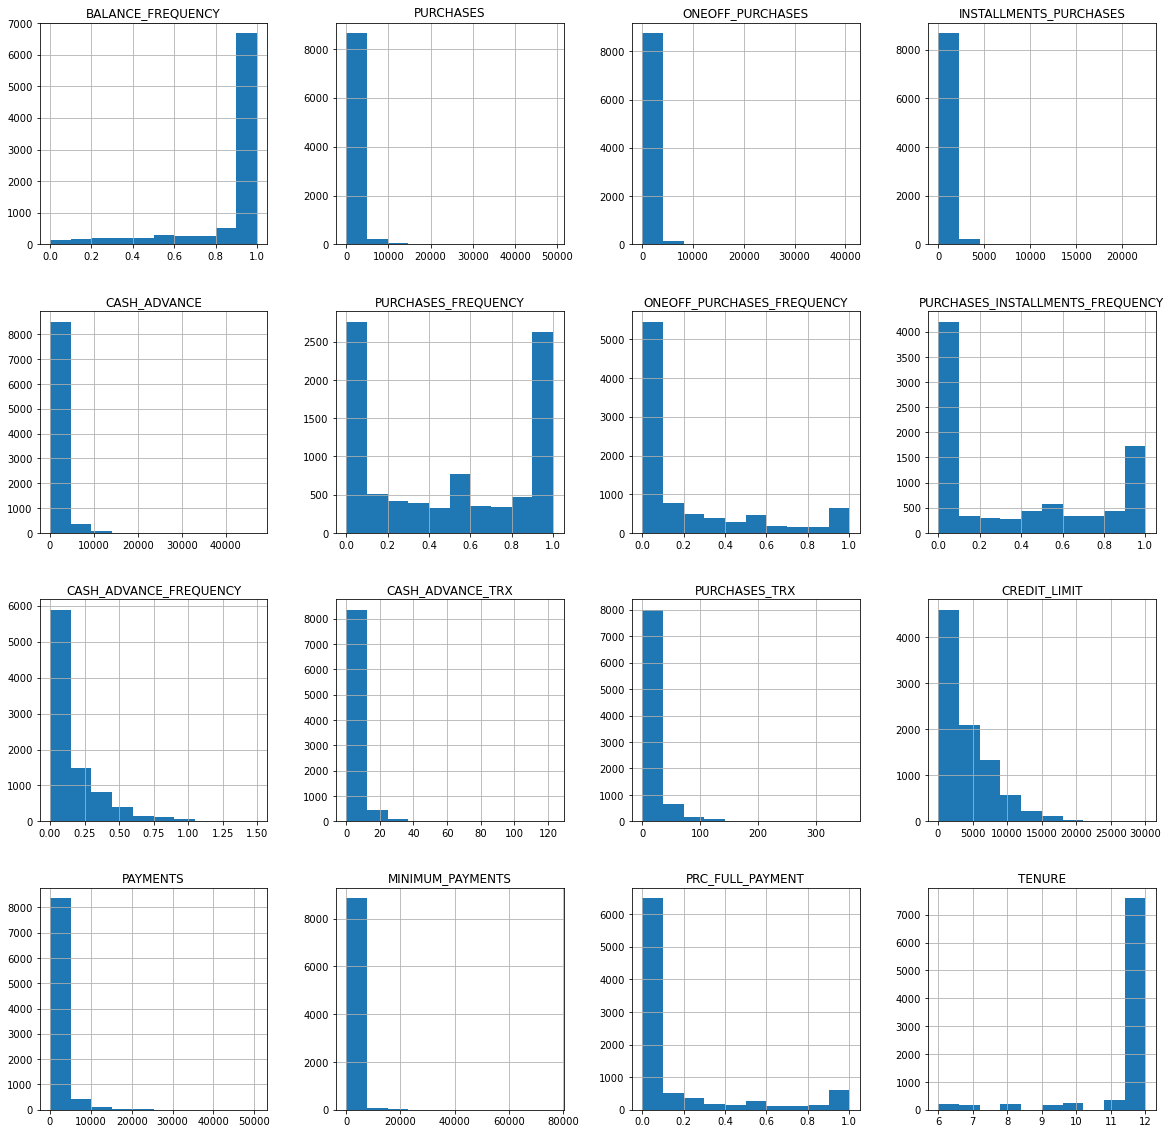

In [5]:
data.hist(figsize=(20,20))

In [6]:
data.columns

Index(['BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

In [7]:
data_logged = data.copy()

In [8]:
data_logged = np.log1p(data_logged)

array([[<AxesSubplot:title={'center':'BALANCE_FREQUENCY'}>,
        <AxesSubplot:title={'center':'PURCHASES'}>,
        <AxesSubplot:title={'center':'ONEOFF_PURCHASES'}>,
        <AxesSubplot:title={'center':'INSTALLMENTS_PURCHASES'}>],
       [<AxesSubplot:title={'center':'CASH_ADVANCE'}>,
        <AxesSubplot:title={'center':'PURCHASES_FREQUENCY'}>,
        <AxesSubplot:title={'center':'ONEOFF_PURCHASES_FREQUENCY'}>,
        <AxesSubplot:title={'center':'PURCHASES_INSTALLMENTS_FREQUENCY'}>],
       [<AxesSubplot:title={'center':'CASH_ADVANCE_FREQUENCY'}>,
        <AxesSubplot:title={'center':'CASH_ADVANCE_TRX'}>,
        <AxesSubplot:title={'center':'PURCHASES_TRX'}>,
        <AxesSubplot:title={'center':'CREDIT_LIMIT'}>],
       [<AxesSubplot:title={'center':'PAYMENTS'}>,
        <AxesSubplot:title={'center':'MINIMUM_PAYMENTS'}>,
        <AxesSubplot:title={'center':'PRC_FULL_PAYMENT'}>,
        <AxesSubplot:title={'center':'TENURE'}>]], dtype=object)

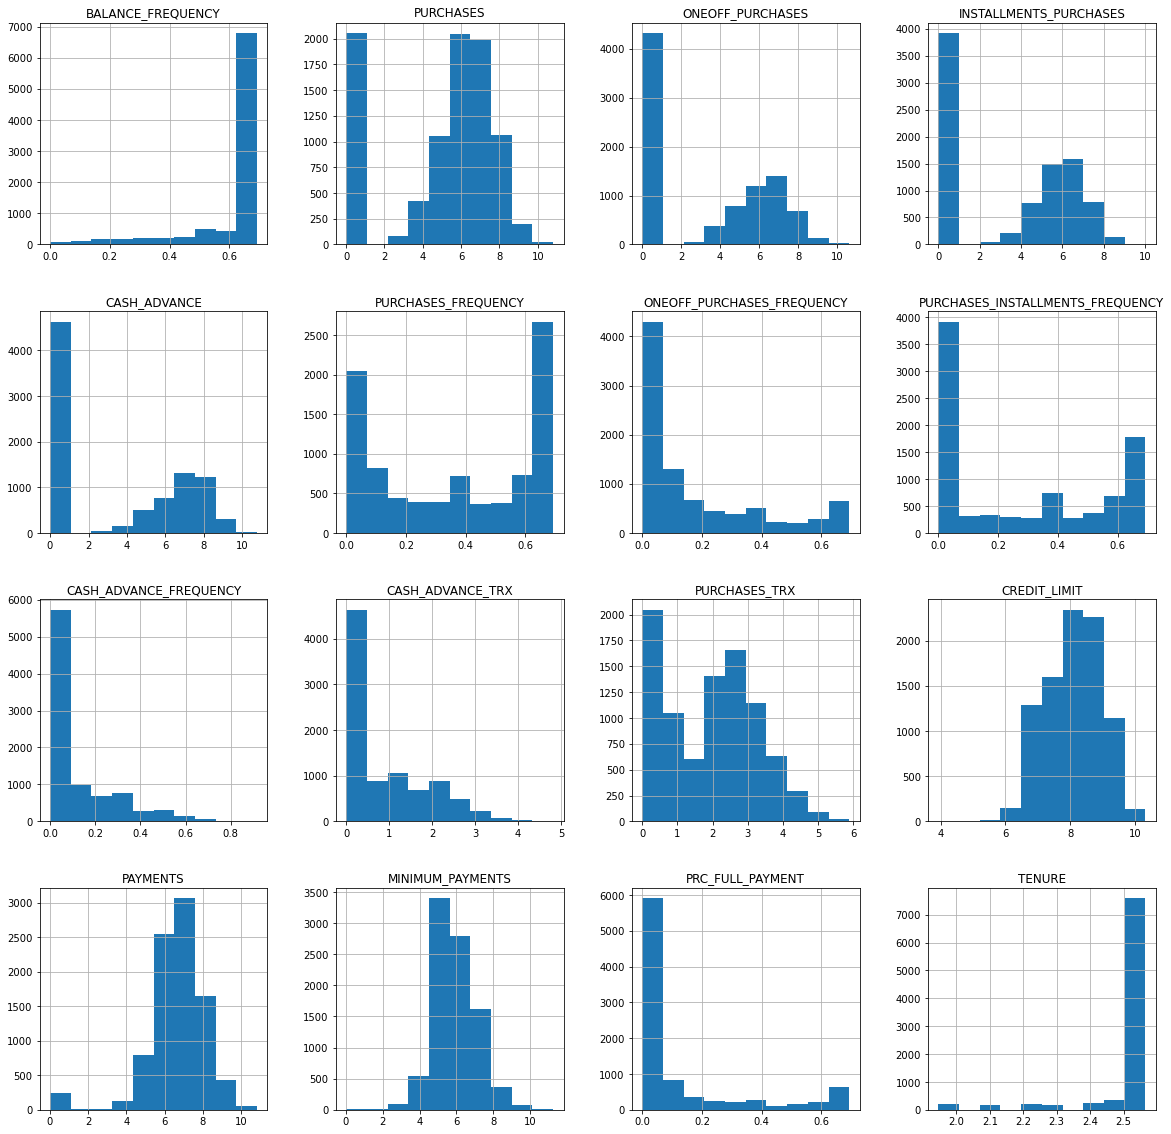

In [9]:
data_logged.hist(figsize=(20,20))

#### Save the results of log transformation

In [10]:
data_logged.head()

,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0.597837,4.568506,0.000000,4.568506,0.000000,0.154151,0.000000,0.080042,0.000000,0.000000,1.098612,6.908755,5.312231,4.945277,0.000000,2.564949
1,0.646627,0.000000,0.000000,0.000000,8.770896,0.000000,0.000000,0.000000,0.223144,1.609438,0.000000,8.853808,8.319725,6.978531,0.200671,2.564949
2,0.693147,6.651791,6.651791,0.000000,0.000000,0.693147,0.693147,0.000000,0.000000,0.000000,2.564949,8.922792,6.434654,6.442994,0.000000,2.564949
3,0.492477,7.313220,7.313220,0.000000,5.331694,0.080042,0.080042,0.000000,0.080042,0.693147,0.693147,8.922792,0.000000,5.747301,0.000000,2.564949
4,0.693147,2.833213,2.833213,0.000000,0.000000,0.080042,0.080042,0.000000,0.000000,0.000000,0.693147,7.090910,6.521114,5.504483,0.000000,2.564949


In [11]:
data_logged['BALANCE'] = y

In [12]:
data_logged.to_csv('Data_Transformations/data_logged.csv', index=None)

## Clipping data

In [13]:
data_clipped = data.copy()

In [14]:
for i in data.columns:
    upper_limit = data_clipped[i].quantile(0.95)
    lower_limit = data[i].quantile(0.05)
    data_clipped[i] = data_clipped[i].clip(lower_limit, upper_limit, axis = 0)
    
data_clipped.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE_FREQUENCY,8950.0,0.883252,0.218438,0.272727,0.888889,1.000000,1.000000,1.000000
PURCHASES,8950.0,823.863022,1099.813081,0.000000,39.635000,361.280000,1110.130000,3998.619500
ONEOFF_PURCHASES,8950.0,447.948730,746.133555,0.000000,0.000000,38.000000,577.405000,2671.094000
INSTALLMENTS_PURCHASES,8950.0,336.336040,497.830168,0.000000,0.000000,89.000000,468.637500,1750.087500
CASH_ADVANCE,8950.0,817.161146,1349.178282,0.000000,0.000000,0.000000,1113.821139,4647.169122
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.000000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.000000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.000000
CASH_ADVANCE_FREQUENCY,8950.0,0.127637,0.176670,0.000000,0.000000,0.000000,0.222222,0.583333
CASH_ADVANCE_TRX,8950.0,2.731732,4.292846,0.000000,0.000000,0.000000,4.000000,15.000000


array([[<AxesSubplot:title={'center':'BALANCE_FREQUENCY'}>,
        <AxesSubplot:title={'center':'PURCHASES'}>,
        <AxesSubplot:title={'center':'ONEOFF_PURCHASES'}>,
        <AxesSubplot:title={'center':'INSTALLMENTS_PURCHASES'}>],
       [<AxesSubplot:title={'center':'CASH_ADVANCE'}>,
        <AxesSubplot:title={'center':'PURCHASES_FREQUENCY'}>,
        <AxesSubplot:title={'center':'ONEOFF_PURCHASES_FREQUENCY'}>,
        <AxesSubplot:title={'center':'PURCHASES_INSTALLMENTS_FREQUENCY'}>],
       [<AxesSubplot:title={'center':'CASH_ADVANCE_FREQUENCY'}>,
        <AxesSubplot:title={'center':'CASH_ADVANCE_TRX'}>,
        <AxesSubplot:title={'center':'PURCHASES_TRX'}>,
        <AxesSubplot:title={'center':'CREDIT_LIMIT'}>],
       [<AxesSubplot:title={'center':'PAYMENTS'}>,
        <AxesSubplot:title={'center':'MINIMUM_PAYMENTS'}>,
        <AxesSubplot:title={'center':'PRC_FULL_PAYMENT'}>,
        <AxesSubplot:title={'center':'TENURE'}>]], dtype=object)

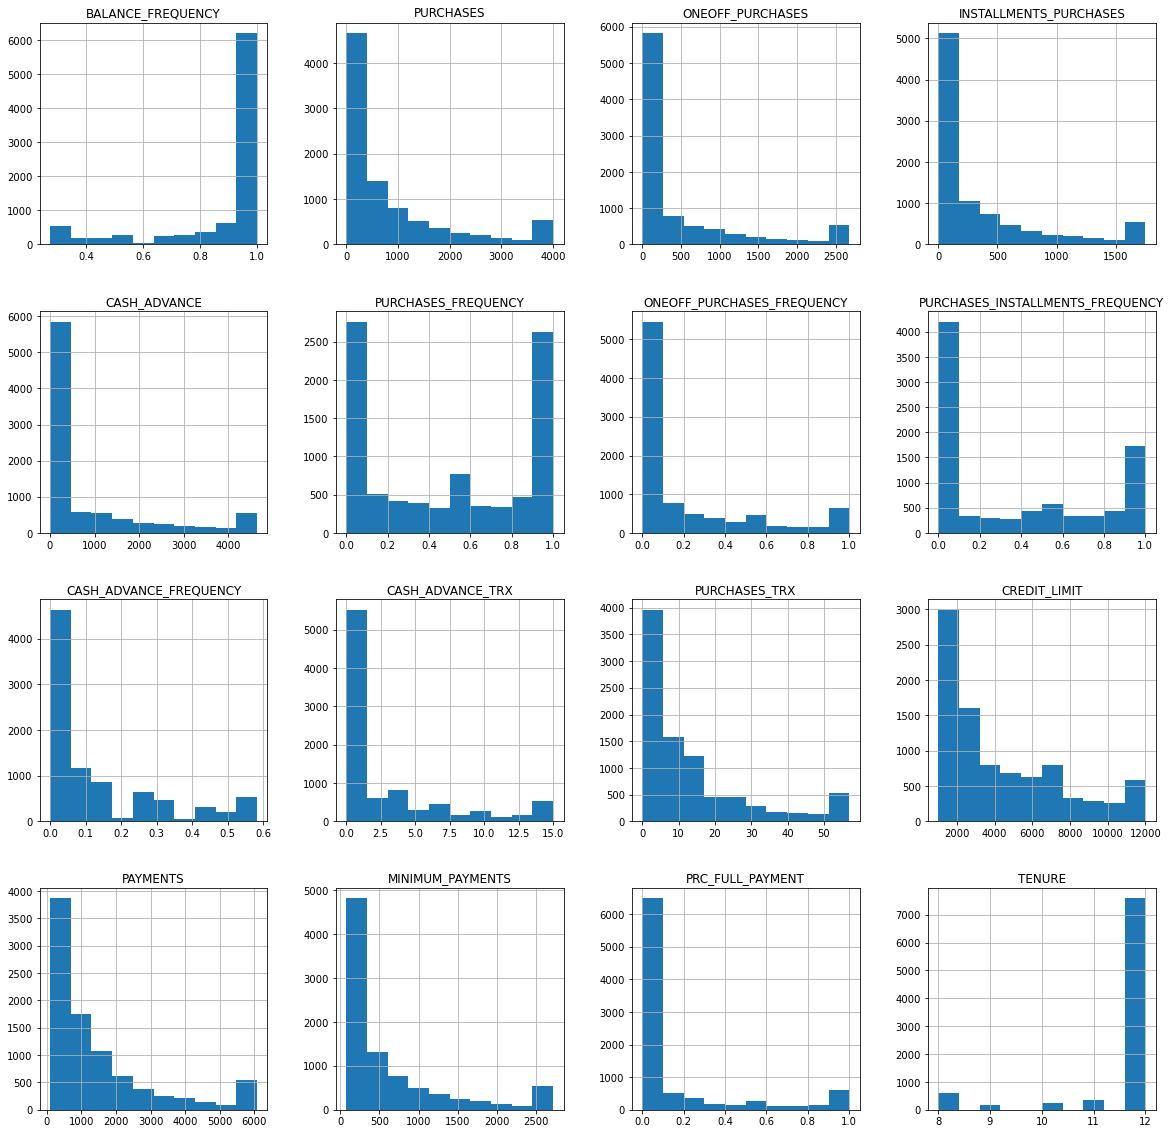

In [15]:
data_clipped.hist(figsize=(20,20))

#### Save clipped data

In [16]:
data_clipped['BALANCE'] = y

In [17]:
data_clipped.head()

,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,BALANCE
0,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0.0,2.0,1000.0,201.802084,139.509787,0.000000,12.0,40.900749
1,0.909091,0.00,0.00,0.0,4647.169122,0.000000,0.000000,0.000000,0.250000,4.0,0.0,7000.0,4103.032597,1072.340217,0.222222,12.0,3202.467416
2,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0.0,12.0,7500.0,622.066742,627.284787,0.000000,12.0,2495.148862
3,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1.0,1.0,7500.0,89.988924,312.343947,0.000000,12.0,1666.670542
4,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0.0,1.0,1200.0,678.334763,244.791237,0.000000,12.0,817.714335


In [18]:
data_clipped.to_csv('Data_Transformations/data_clipped.csv', index=None)

## 3. Data Scalling - MinMax - StandardScaler - RobustScaler  

In [19]:
data_minmax   = data.copy()
data_standard = data.copy()
data_robust   = data.copy()

#### MinMax Scaler

In [20]:
scaler_minmax = MinMaxScaler()
model_minmax  = scaler_minmax.fit(data_minmax)
data_minmax   = model_minmax.transform(data_minmax)

In [21]:
data_minmax

array([[8.18182000e-01, 1.94536779e-03, 0.00000000e+00, ...,
        1.82564563e-03, 0.00000000e+00, 1.00000000e+00],
       [9.09091000e-01, 0.00000000e+00, 0.00000000e+00, ...,
        1.40344791e-02, 2.22222000e-01, 1.00000000e+00],
       [1.00000000e+00, 1.57662475e-02, 1.89682603e-02, ...,
        8.20961806e-03, 0.00000000e+00, 1.00000000e+00],
       ...,
       [8.33333000e-01, 2.94456089e-03, 0.00000000e+00, ...,
        1.07843629e-03, 2.50000000e-01, 0.00000000e+00],
       [8.33333000e-01, 0.00000000e+00, 0.00000000e+00, ...,
        7.29475795e-04, 2.50000000e-01, 0.00000000e+00],
       [6.66667000e-01, 2.22932216e-02, 2.68208163e-02, ...,
        1.15527021e-03, 0.00000000e+00, 0.00000000e+00]])

In [22]:
data_minmax = pd.DataFrame(data_minmax)

In [23]:
data_minmax.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.818182,0.001945,0.000000,0.00424,0.000000,0.166667,0.000000,0.083333,0.000000,0.00000,0.005587,0.031720,0.003979,0.001826,0.000000,1.0
1,0.909091,0.000000,0.000000,0.00000,0.136685,0.000000,0.000000,0.000000,0.166667,0.03252,0.000000,0.232053,0.080893,0.014034,0.222222,1.0
2,1.000000,0.015766,0.018968,0.00000,0.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.033520,0.248748,0.012264,0.008210,0.000000,1.0
3,0.636364,0.030567,0.036775,0.00000,0.004366,0.083333,0.083333,0.000000,0.055555,0.00813,0.002793,0.248748,0.000000,0.004088,0.000000,1.0
4,1.000000,0.000326,0.000393,0.00000,0.000000,0.083333,0.083333,0.000000,0.000000,0.00000,0.002793,0.038397,0.013374,0.003204,0.000000,1.0


In [24]:
data_minmax['y'] = y

In [25]:
data_minmax.to_csv('Data_Transformations/data_minmax.csv', index=None)

#### Standard Scaler

In [26]:
scaler_standard = StandardScaler()
model_standard  = scaler_standard.fit(data_standard)
data_standard   = model_standard.transform(data_standard)

In [27]:
data_standard

array([[-0.24943448, -0.42489974, -0.35693402, ..., -0.3024    ,
        -0.52555097,  0.36067954],
       [ 0.13432467, -0.46955188, -0.35693402, ...,  0.09749953,
         0.2342269 ,  0.36067954],
       [ 0.51808382, -0.10766823,  0.10888851, ..., -0.0932934 ,
        -0.52555097,  0.36067954],
       ...,
       [-0.18547673, -0.40196519, -0.35693402, ..., -0.32687479,
         0.32919999, -4.12276757],
       [-0.18547673, -0.46955188, -0.35693402, ..., -0.33830497,
         0.32919999, -4.12276757],
       [-0.88903307,  0.04214581,  0.30173158, ..., -0.3243581 ,
        -0.52555097, -4.12276757]])

In [28]:
data_standard = pd.DataFrame(data_standard)
data_standard.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,-0.249434,-0.424900,-0.356934,-0.349079,-0.466786,-0.806490,-0.678661,-0.707313,-0.675349,-0.476070,-0.511333,-0.960378,-0.528979,-0.302400,-0.525551,0.36068
1,0.134325,-0.469552,-0.356934,-0.454576,2.605605,-1.221758,-0.678661,-0.916995,0.573963,0.110074,-0.591796,0.688678,0.818642,0.097500,0.234227,0.36068
2,0.518084,-0.107668,0.108889,-0.454576,-0.466786,1.269843,2.673451,-0.916995,-0.675349,-0.476070,-0.109020,0.826100,-0.383805,-0.093293,-0.525551,0.36068
3,-1.016953,0.232058,0.546189,-0.454576,-0.368653,-1.014125,-0.399319,-0.916995,-0.258913,-0.329534,-0.551565,0.826100,-0.598688,-0.228307,-0.525551,0.36068
4,0.518084,-0.462063,-0.347294,-0.454576,-0.466786,-1.014125,-0.399319,-0.916995,-0.675349,-0.476070,-0.551565,-0.905410,-0.364368,-0.257266,-0.525551,0.36068


In [29]:
data_standard['y'] = y

In [30]:
data_standard.to_csv('Data_Transformations/data_standard.csv', index=None)

#### Robust Scaler

In [31]:
scaler_robust = RobustScaler()
model_robust  = scaler_robust.fit(data_robust)
data_robust   = model_robust.transform(data_robust)

In [32]:
data_robust

array([[-1.63636364, -0.24837108, -0.06581169, ..., -0.27973218,
         0.        ,  0.        ],
       [-0.81818182, -0.33748873, -0.06581169, ...,  1.23005435,
         1.55555556,  0.        ],
       [ 0.        ,  0.38476593,  1.27323109, ...,  0.50973191,
         0.        ,  0.        ],
       ...,
       [-1.5000045 , -0.20259786, -0.06581169, ..., -0.37213466,
         1.75000175, -6.        ],
       [-1.5000045 , -0.33748873, -0.06581169, ..., -0.41528832,
         1.75000175, -6.        ],
       [-3.        ,  0.68376779,  1.82757337, ..., -0.36263312,
         0.        , -6.        ]])

In [33]:
data_robust = pd.DataFrame(data_robust)
data_robust.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,-1.636364,-0.248371,-0.065812,0.013657,0.000000,-0.399999,-0.277777,-0.111112,0.000000,0.00,-0.3125,-0.408163,-0.431595,-0.279732,0.000000,0.0
1,-0.818182,-0.337489,-0.065812,-0.189912,5.784542,-0.600000,-0.277777,-0.222223,1.125001,1.00,-0.4375,0.816327,2.138626,1.230054,1.555556,0.0
2,0.000000,0.384766,1.273231,-0.189912,0.000000,0.600000,3.055557,-0.222223,0.000000,0.00,0.3125,0.918367,-0.154715,0.509732,0.000000,0.0
3,-3.272727,1.062798,2.530286,-0.189912,0.184759,-0.500000,0.000000,-0.222223,0.374999,0.25,-0.3750,0.918367,-0.564547,0.000000,0.000000,0.0
4,0.000000,-0.322542,-0.038102,-0.189912,0.000000,-0.500000,0.000000,-0.222223,0.000000,0.00,-0.3750,-0.367347,-0.117644,-0.109334,0.000000,0.0


In [34]:
data_robust['y'] = y

In [35]:
data_robust.to_csv('Data_Transformations/data_robust.csv', index=None)